# 📌 Practical Exercise: Spam Classification with Deep Learning

Objective
In this exercise, you will create a Spam Classification Model using Natural Language Processing (NLP) and Deep Learning.
 By the end, you’ll be able to:
 ✅ Process text data using NLTK and TF-IDF
 ✅ Build a Neural Network Model using TensorFlow/Keras
 ✅ Train and evaluate your model for spam detection

## 🛠️ Step 1: Setup the Environment

To begin, install and import the necessary libraries.
🔹 Task:
Install NLTK and download essential NLP resources.
Import TensorFlow and other required libraries.
💡 Hint: Use pip install nltk to install the required package.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import tensorflow as tf
import string
import re

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

2025-05-13 08:00:51.314974: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 08:00:51.373126: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-05-13 08:00:51.375102: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-05-13 08:00:51.376416: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-05-13 08:00:51.389995: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-13 08:00:51.393821: I tensorflow/core/platform/cpu_feature_guard.cc:1

True

## 📊 Step 2: Load and Explore the Dataset

We will use a dataset containing SMS messages labeled as Spam or Ham (not spam).
🔹 Task:
Load the dataset using pandas.
Display the first few rows to understand the structure.
Identify the feature (SMS text) and target (Spam/Ham labels).
💡 Hint: Use pd.read_csv() to load the data.

In [2]:
df = pd.read_csv("Spam-Classification.csv")
df.head()

,CLASS,SMS
0,ham,"said kiss, kiss, i can't do the sound effects..."
1,ham,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.
2,spam,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
4,spam,**FREE MESSAGE**Thanks for using the Auction S...


In [4]:
# Nettoyage de base : on supprime les lignes vides
df = df.dropna(subset=['SMS'])
print(df['CLASS'].value_counts())

CLASS
ham     752
spam    748
Name: count, dtype: int64


## 📜 Step 3: Preprocess the Text Data

Before training a model, we need to clean and process the text.
🔹 Task:
Tokenize the text into words.
Remove stopwords (common words like "the", "is", etc.).
Apply lemmatization to reduce words to their root form.
💡 Hint: Use nltk.word_tokenize() for tokenization and WordNetLemmatizer() for lemmatization.

In [5]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['SMS'].apply(preprocess_text)
df[['SMS', 'clean_text']].head()


,SMS,clean_text
0,"said kiss, kiss, i can't do the sound effects...","said kiss , kiss , ca n't sound effect ! gorge..."
1,&lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.,& lt ; # & gt ; ish minute 5 minute ago . wtf .
2,(Bank of Granite issues Strong-Buy) EXPLOSIVE ...,( bank granite issue strong-buy ) explosive pi...
3,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...,* free * polyphonic ringtone text super 87131 ...
4,**FREE MESSAGE**Thanks for using the Auction S...,* * free message * * thanks using auction subs...


## 🔢 Step 4: Convert Text to Numerical Representation

Since deep learning models cannot work directly with text, we will convert it into numerical format using TF-IDF (Term Frequency-Inverse Document Frequency).
🔹 Task:
Apply TF-IDF Vectorization to convert text data into a numerical matrix.
Encode the Spam/Ham labels into numeric values (One-Hot Encoding).
Split the dataset into Training and Testing sets.
💡 Hint: Use TfidfVectorizer() from sklearn.feature_extraction.text.

In [23]:
#Apply TF-IDF Vectorization
Vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_text'])

# Label Encoding (ham = 0, spam = 1)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['CLASS'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Dimensions du résultat
print("TF-IDF shape:", X.shape)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

TF-IDF shape: (1500, 4269)
Training set size: (1200, 4269)
Test set size: (300, 4269)


## 🧠 Step 5: Build a Neural Network Model

We will use TensorFlow/Keras to create a simple Feedforward Neural Network for text classification.
🔹 Task:
Define a Sequential Model with:
Two hidden layers with ReLU activation
An output layer with Softmax activation
Compile the model using categorical cross-entropy as the loss function.
💡 Hint: Use model.add(Dense(...)) to add layers.

In [20]:
# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Défine model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))  # 2 classes: ham/spam

# Compiling the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                273280    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 275426 (1.05 MB)
Trainable params: 275426 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 🚀 Step 6: Train the Model

We will train our model using the Training dataset and monitor its accuracy over multiple epochs.
🔹 Task:
Set Batch Size = 256, Epochs = 10, and Validation Split = 20%.
Train the model using model.fit().
Plot the training accuracy over epochs.
💡 Hint: Use history.history["accuracy"] to visualize the training progress.

Epoch 1/10
4/4 [==============================] - 1s 65ms/step - loss: 0.6907 - accuracy: 0.5719 - val_loss: 0.6835 - val_accuracy: 0.7375
Epoch 2/10
4/4 [==============================] - 0s 22ms/step - loss: 0.6724 - accuracy: 0.9115 - val_loss: 0.6693 - val_accuracy: 0.8167
Epoch 3/10
4/4 [==============================] - 0s 14ms/step - loss: 0.6492 - accuracy: 0.9688 - val_loss: 0.6486 - val_accuracy: 0.8500
Epoch 4/10
4/4 [==============================] - 0s 26ms/step - loss: 0.6183 - accuracy: 0.9760 - val_loss: 0.6207 - val_accuracy: 0.8792
Epoch 5/10
4/4 [==============================] - 0s 20ms/step - loss: 0.5783 - accuracy: 0.9823 - val_loss: 0.5863 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 0s 22ms/step - loss: 0.5312 - accuracy: 0.9844 - val_loss: 0.5466 - val_accuracy: 0.9125
Epoch 7/10
4/4 [==============================] - 0s 37ms/step - loss: 0.4774 - accuracy: 0.9875 - val_loss: 0.5024 - val_accuracy: 0.9125
Epoch 8/10
4/4 [===========

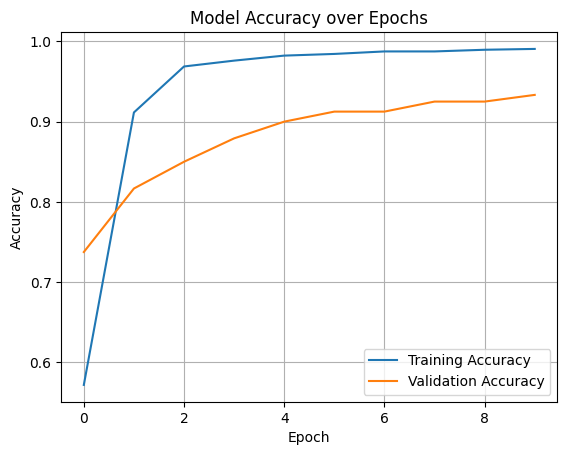

In [26]:
# Train model
history = model.fit(
    X_train.toarray(), y_train_cat,
    batch_size=256,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 📈 Step 7: Evaluate the Model

After training, we need to test how well our model performs on unseen test data.
🔹 Task:
Evaluate the model using the Test dataset.
Display the accuracy score on the test data.
💡 Hint: Use model.evaluate().

In [41]:
test_loss, test_accuracy = model.evaluate(X_test.toarray(), y_test_cat, verbose=0)

# Afficher l'accuracy
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

✅ Test Accuracy: 93.67%


In [53]:
print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Ham', 'Spam']))


📋 Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.92      0.94       150
        Spam       0.92      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



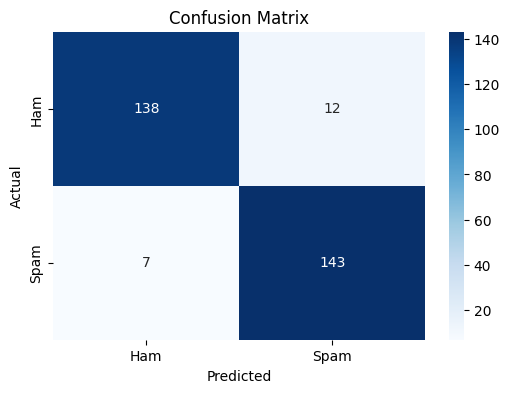


📋 Classification Report:
              precision    recall  f1-score   support

         Ham       0.95      0.92      0.94       150
        Spam       0.92      0.95      0.94       150

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



In [50]:
# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 📌 Step 8: Make Predictions on New Messages

Now, let's test our trained model by predicting whether a new message is Spam or Ham.
🔹 Task:
Convert new text messages into TF-IDF features.
Predict their class using the trained model.
Display the Spam/Ham result.
💡 Hint: Use model.predict().

In [44]:
def predict_message(msg):
    clean = preprocess_text(msg)
    vec = vectorizer.transform([clean]).toarray()
    pred = model.predict(vec)[0][0]
    return "Spam" if pred > 0.5 else "Ham"

# Exemple
print(predict_message("Congratulations! You won a $1000 Walmart gift card. Call now!"))
print(predict_message("Salut, on se voit à 18h ?"))

1/1 [==============================] - 0s 27ms/step
Ham
1/1 [==============================] - 0s 30ms/step
Spam
